# AO3

In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [35]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [64]:
def graficosTagsAO3(Tag='Childhood%20Friends', Freq='Daily'):
  url = 'https://archiveofourown.org/tags/{}/works?page=1'.format(Tag)
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'html.parser')
  count = soup.find_all("ol", class_="pagination actions")[0].get_text().split(' ')[-3]
  dicc = {}
  for i in tqdm(range(int(count))):
    url = 'https://archiveofourown.org/tags/'+Tag+'/works?page='+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for el in soup.find_all("p", class_="datetime"):
      if Freq == 'Daily':
        eltext = el.get_text().replace(' Jan ', "/1/").replace(' Feb ', "/2/").replace(' Mar ', "/3/").replace(' Apr ', "/4/").replace(' May ', "/5/").replace(' Jun ', "/6/").replace(' July ', "/7/").replace(' Aug ', "/8/").replace(' Sep ', "/9/").replace(' Oct ', "/10/").replace(' Nov ', "/11/").replace(' Dec ', "/12/")
      else:
        eltext = el.get_text()[-9:].replace(' Jan ', "1/").replace(' Feb ', "2/").replace(' Mar ', "3/").replace(' Apr ', "4/").replace(' May ', "5/").replace(' Jun ', "6/").replace(' July ', "7/").replace(' Aug ', "8/").replace(' Sep ', "9/").replace(' Oct ', "10/").replace(' Nov ', "11/").replace(' Dec ', "12/")
      if eltext in dicc:
        dicc[eltext] += 1
      else:
        dicc[eltext] = 1
  return dicc

In [65]:
d = graficosTagsAO3(Tag='Blood%20Magic', Freq='Monthly')

100%|██████████| 191/191 [03:55<00:00,  1.23s/it]


In [82]:
import pandas as pd
import numpy as np

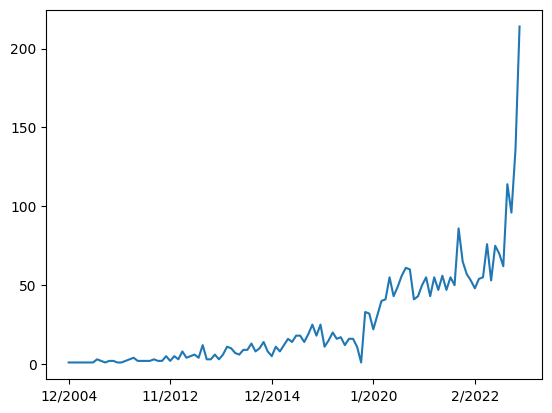

In [93]:
lists =reversed(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(1,1) 
ax.plot(x,y)
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(6))


plt.show()

In [87]:
np.arange(2,10,2)

array([2, 4, 6, 8])